# SET (grib file)

In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [3]:
!conda --version
!which conda

conda 4.11.0
/usr/local/bin/conda


In [4]:
!conda install metview  -c conda-forge
!pip install metview

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

# All requested packages already installed.



In [5]:
# # force restart after installation
# import os
# os.kill(os.getpid(), 9)

In [6]:
import metview as mv

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
filename = "drive/MyDrive/AC297r Capstone QB Group/Data/SET/SET_weekly_global.grib"

if mv.exist(filename):
    wg = mv.read(filename)
else:
    wg = mv.gallery.load_dataset(filename)
print(wg)
print(len(wg))

Fieldset (1320 fields)
1320


In [9]:
# mv.grib_get(wg, ['shortName', 'dataDate', 'dataTime','stepRange', 'validityDate', 'validityTime'])

# Test: obtain time series at target coordinates

In [10]:
coords=[[37,-100],[39.1,-101.2],[41.2,-111.1],[42.2,-112.1]]

In [11]:
def ts_gen(coords,df=False):
  for i in range(len(coords)):
    roff = np.array(mv.nearest_gridpoint(wg['ro'], coords))
    evap = np.array(mv.nearest_gridpoint(wg['e'], coords))
    times = mv.valid_date(wg['ro'])
  if df==True:
    df=pd.DataFrame(zip(times,roff,evap),columns=['time','run_off','evaporation'])
    return times, roff, evap, df
  else: 
    return times, roff, evap

In [12]:
from tqdm import tqdm

In [13]:
for i in tqdm(coords):
  _,_,_=ts_gen(i,df=False)

100%|██████████| 4/4 [25:09<00:00, 377.40s/it]


In [17]:
times, roff, evap,df=ts_gen([42.374506, -71.117134],df=True)
df

,time,run_off,evaporation
0,2011-01-04 14:00:00,0.000071,-0.000013
1,2011-01-10 14:00:00,0.000076,-0.000359
2,2011-01-16 14:00:00,0.000081,0.000036
3,2011-01-22 14:00:00,0.000087,0.000012
4,2011-01-28 14:00:00,0.000095,0.000038
...,...,...,...
655,2021-12-04 14:00:00,0.000397,-0.000167
656,2021-12-10 14:00:00,0.000403,-0.000123
657,2021-12-16 14:00:00,0.000499,-0.000025
658,2021-12-22 14:00:00,0.000454,0.000034


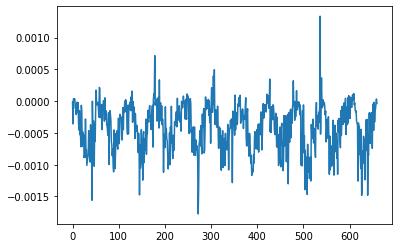

In [21]:
import matplotlib.pyplot as plt
plt.plot(evap)

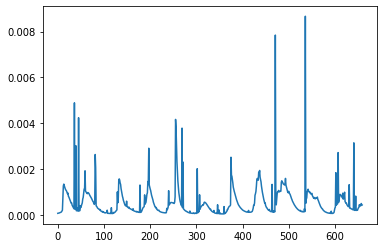

In [22]:
plt.plot(roff)

In [19]:
df.to_csv('SET_TS.csv', index=True)

## Test: use `ts_gen` directly in model fitting

In [15]:
from sklearn import linear_model
linreg=linear_model.LinearRegression()

In [16]:
#linreg.fit(ts_gen(coords[1])[2].reshape(-1,1),ts_gen(coords[1])[1])
#linreg.coef_